### Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm, metrics
import secrets

### Generate Gaussian Distributions

In [6]:
# Create a default random number generator
rng = np.random.default_rng(42672244757883671377369755671764847711)

gaus1 = rng.normal(loc=0.5, scale=0.5, size=(120,8))
gaus2 = rng.normal(loc=1.5, scale=1.5, size=(120,8))
gaus3 = rng.normal(loc=0.5, scale=0.5, size=(120,8))
gaus4 = rng.normal(loc=1.5, scale=1.5, size=(120,8))

#print(gaus1, " ", gaus2, " ", gaus3, " ", gaus4)

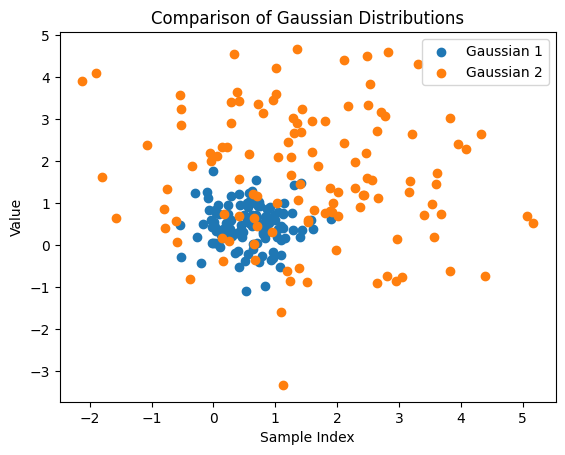

In [8]:
# Create a scatter plot to compare gaus1 and gaus2
plt.scatter(gaus1[:,0], gaus1[:,1], label = 'Gaussian 1')
plt.scatter(gaus2[:,0], gaus2[:,1], label = 'Gaussian 2')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Gaussian Distributions')
plt.legend()

# Display the plot
plt.show()

### Generate Uniform Distributions

In [10]:
uni1 = rng.uniform(low=0, high=0.4, size=(120,8))
uni2 = rng.uniform(low=0.15, high=0.5, size=(120,8))
uni3 = rng.uniform(low=0, high=0.4, size=(120,8))
uni4 = rng.uniform(low=0.15, high=0.5, size=(120,8))

print(uni1, " ", uni2, " ", uni3, " ", uni4)

[[0.01125208 0.10017662 0.05174351 0.24465271 0.13282601 0.30654505
  0.13931912 0.07346308]
 [0.22158339 0.10595823 0.33470677 0.30425388 0.07420557 0.19835517
  0.36852303 0.37835833]
 [0.35471797 0.38048398 0.03409764 0.32047046 0.37120994 0.39328496
  0.1101669  0.2420347 ]
 [0.04649259 0.07457131 0.34468833 0.17816028 0.06519786 0.03325503
  0.04127051 0.33238853]
 [0.37075031 0.09825927 0.35745415 0.38822754 0.02294357 0.00574805
  0.33499065 0.19651285]
 [0.10150258 0.34428927 0.06262366 0.01528735 0.11674432 0.34515475
  0.25247529 0.03759655]
 [0.28113375 0.00089342 0.05219541 0.10440609 0.28724152 0.0646409
  0.35249518 0.23604099]
 [0.14614103 0.20741646 0.10336077 0.27661168 0.28231041 0.35904647
  0.34965248 0.10964205]
 [0.09581958 0.19656029 0.20360868 0.02134875 0.39035211 0.18462164
  0.18562684 0.03174302]
 [0.08422203 0.00204761 0.36661779 0.2614425  0.29978925 0.39700325
  0.33970104 0.29478374]
 [0.12776292 0.22291516 0.24501462 0.18531229 0.11288894 0.35643734
  0

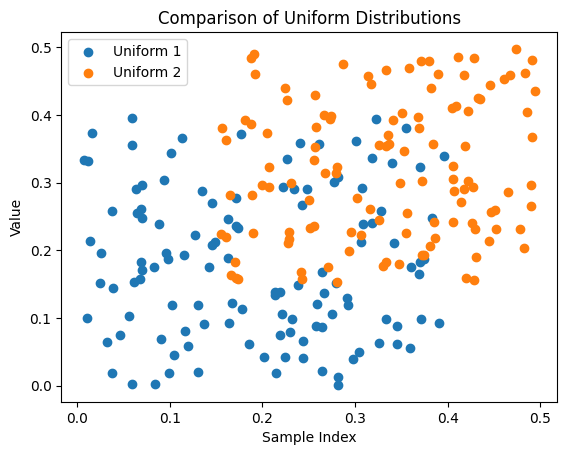

In [12]:
# Create a scatter plot to compare uni1 and uni2
plt.scatter(uni1[:,0], uni1[:,1], label = 'Uniform 1')
plt.scatter(uni2[:,0], uni2[:,1], label = 'Uniform 2')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Uniform Distributions')
plt.legend()

# Display the plot
plt.show()

### Generate Categorical Distribution

In [14]:
cat1 = rng.poisson(lam=1, size=(240,8))
cat2 = rng.poisson(lam=1, size=(240,8))

print(cat1, " ", cat2)

[[0 0 4 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [1 2 2 ... 0 0 1]
 ...
 [1 0 0 ... 2 1 0]
 [0 1 1 ... 1 1 2]
 [1 1 1 ... 0 0 3]]   [[1 3 2 ... 0 2 0]
 [2 2 0 ... 0 1 4]
 [1 0 3 ... 1 2 1]
 ...
 [0 1 4 ... 2 0 2]
 [0 1 2 ... 0 0 2]
 [1 0 2 ... 2 0 0]]


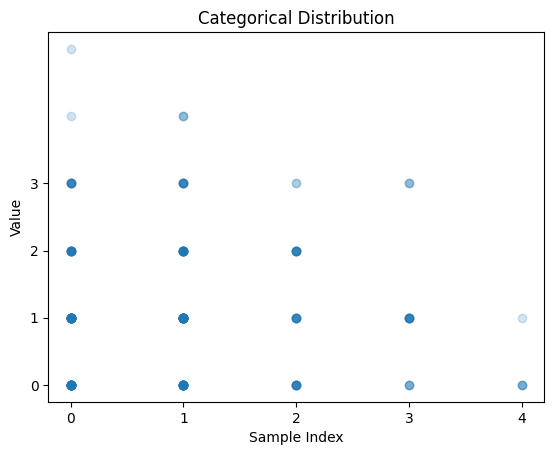

In [16]:
# Create a scatter plot to compare uni1 and uni2
plt.scatter(cat1[:,0], cat1[:,1], alpha=0.2)

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.yticks(range(0, 4))
plt.title('Categorical Distribution')
plt.xticks(range(0, 5))

# Display the plot
plt.show()

### Combine the Datasets

In [59]:
stacked_gaus = np.vstack((gaus1, gaus2))
stacked_uni = np.vstack((uni1, uni2))

zeros_column = np.zeros((120, 1)).astype(int)
ones_column = np.ones((120,1)).astype(int)
label_column = np.vstack((zeros_column, ones_column))

stacked_all = np.hstack((stacked_gaus, stacked_uni, cat1, label_column))

print(stacked_all.shape)

(240, 25)


In [60]:
stacked_gaus2 = np.vstack((gaus3, gaus4))
stacked_uni2 = np.vstack((uni3, uni4))

zeros_column2 = np.zeros((120, 1)).astype(int)
ones_column2 = np.ones((120,1)).astype(int)
label_column2 = np.vstack((zeros_column2, ones_column2))

stacked_all2 = np.hstack((stacked_gaus2, stacked_uni2, cat2, label_column2))

print(stacked_all2.shape)

(240, 25)


In [78]:
combined_data2 = pd.DataFrame(stacked_all2)
X_train, X_test, y_train, y_test = train_test_split(combined_data2.iloc[:, :-1], combined_data2.iloc[:, -1], test_size = 0.3, random_state = 42)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
dtype: object


In [62]:
stacked_x = np.vstack((X_train, X_test))
stacked_y = np.vstack((np.array(y_train)[:,np.newaxis], np.array(y_test)[:,np.newaxis]))

stacked_all = np.hstack((stacked_x, stacked_y))
print(stacked_all.shape)
#np.savetxt('stacked_all.csv', stacked_all, delimiter=',')

(240, 25)


In [63]:
stacked_x2 = np.vstack((X_train, X_test))
stacked_y2 = np.vstack((np.array(y_train)[:,np.newaxis], np.array(y_test)[:,np.newaxis]))

stacked_all2 = np.hstack((stacked_x2, stacked_y2))
print(stacked_all2.shape)
#np.savetxt('stackedall.csv', stacked_all2, delimiter=',')

(240, 25)


In [64]:
# Create SVM classifier instance with linear kernel
clf = svm.SVC(kernel='linear', random_state = 42)

# Train the model using the training sets
clf.fit(X_train.iloc[:,0:], y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test.iloc[:,0:])

# Print predictions
print("Predictions:", y_pred)

# Calculate F1 score
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Predictions: [0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
F1 Score: 0.9722222222222222
